In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, average_precision_score, auc
)
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [49]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
df = pd.read_csv('creditcard.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [52]:
df.shape

(284807, 31)

In [53]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [55]:
df1 = df

In [56]:
# 2) Basic median imputation (if any) and standard scaling for Amount
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)

In [57]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [58]:
# Class distribution
print("\nClass distribution:")
print(df['Class'].value_counts())
print("\nClass distribution (%)")
print(df['Class'].value_counts(normalize=True) * 100)


Class distribution:
Class
0.0    284315
1.0       492
Name: count, dtype: int64

Class distribution (%)
Class
0.0    99.827251
1.0     0.172749
Name: proportion, dtype: float64


In [59]:
# Amount statistics
print("\nAmount statistics:")
print(df['Amount'].describe())


Amount statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


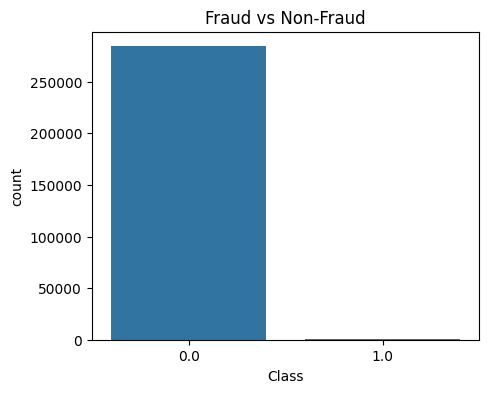

In [60]:
# Fraud vs Non-Fraud count plot
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud")
plt.show()

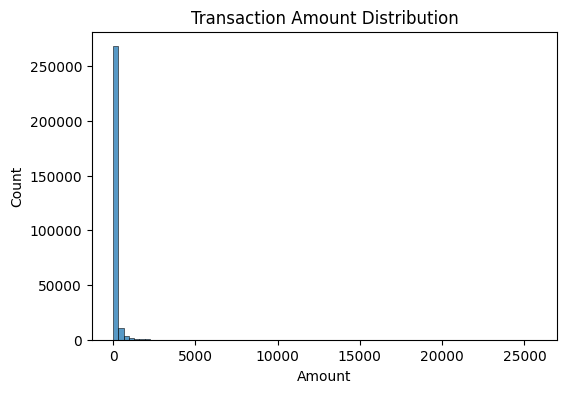

In [61]:
# Transaction Amount Visualization
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=80)
plt.title("Transaction Amount Distribution")
plt.show()

In [62]:
# 2️⃣ Scale the Amount column (VERY important)
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
print("➡ Amount scaled.")


➡ Amount scaled.


In [63]:
# 3️⃣ Real-world Train-Test split (TIME-BASED)
# Banks always split by time, not randomly.
df = df.sort_values('Time').reset_index(drop=True)

train_size = int(0.7 * len(df))
df_train = df[:train_size]
df_test = df[train_size:]
print(f"➡ Train size: {df_train.shape}")
print(f"➡ Test size: {df_test.shape}")

➡ Train size: (199364, 32)
➡ Test size: (85443, 32)


In [64]:
# 4️⃣ Split X and y
X_train = df_train.drop(['Class'], axis=1)
y_train = df_train['Class']

X_test = df_test.drop(['Class'], axis=1)
y_test = df_test['Class']

print("\n * Preprocessing completed successfully!")


 * Preprocessing completed successfully!


In [65]:
# 1️⃣ Log Amount (for reducing skew)
df['log_amount'] = np.log1p(df['Amount'])

In [66]:
# 1️⃣ Log Amount (for reducing skew)
df['log_amount'] = np.log1p(df['Amount'])

print("➡ log_amount created.")


➡ log_amount created.


In [67]:
# 2️⃣ Extract Hour of Day from 'Time'
# Time is in seconds → convert to hour
df['Hour'] = (df['Time'] // 3600) % 24

print("➡ Hour feature created.")


➡ Hour feature created.


In [68]:
# 3️⃣ Amount Z-Score (detect abnormal spending)
df['amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

print("➡ amount_zscore created.")


➡ amount_zscore created.


In [69]:
# 4️⃣ Rolling Transaction Count (Velocity)
# Sorted by time (already sorted in Step 2)
df['rolling_count_1hr'] = df['Time'].rolling(window=3600).count()

print("➡ rolling_count_1hr created.")

➡ rolling_count_1hr created.


In [70]:
# 5️⃣ Rolling Average Amount (short-term trend)
df['rolling_amount_mean'] = df['Amount'].rolling(window=300).mean()

print("➡ rolling_amount_mean created.")


➡ rolling_amount_mean created.


In [71]:
# 6️⃣ Amount Outlier Flag (simple rule)
df['Amount_Outlier_Flag'] = df['Amount'] > df['Amount'].quantile(0.99)


In [72]:
print("➡ Outlier flag created.")

print("\n🎉 Feature Engineering Completed!")

➡ Outlier flag created.

🎉 Feature Engineering Completed!


In [73]:
imputer_final = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer_final.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer_final.transform(X_test), columns=X_test.columns)

print("After final imputation:")
print("Train NaN:", X_train.isna().sum().sum())
print("Test NaN:", X_test.isna().sum().sum())

After final imputation:
Train NaN: 0
Test NaN: 0


In [74]:
# Show updated columns
print("\nNew Columns Added:")
print(df[['log_amount','Hour','amount_zscore','rolling_count_1hr','rolling_amount_mean','Amount_Outlier_Flag']].head())



New Columns Added:
   log_amount  Hour  amount_zscore  rolling_count_1hr  rolling_amount_mean  \
0    5.014760   0.0       0.244964                NaN                  NaN   
1    1.305626   0.0      -0.342474                NaN                  NaN   
2    5.939276   0.0       1.160684                NaN                  NaN   
3    4.824306   0.0       0.140534                NaN                  NaN   
4    4.262539   0.0      -0.073403                NaN                  NaN   

   Amount_Outlier_Flag  
0                False  
1                False  
2                False  
3                False  
4                False  


In [75]:
#Train/test time-based split (70/30)
train_size = int(0.7 * len(df))
train = df.iloc[:train_size].copy()
test = df.iloc[train_size:].copy()

In [76]:
# 5) Choose features (drop Time, Class, and original Amount if you like)
feature_cols = [c for c in df.columns if c.startswith('V')]  # V1..V28
feature_cols += ['Amount_Scaled','log_amount','Hour','amount_zscore','rolling_amount_mean','Amount_Outlier_Flag']

In [77]:
# convert boolean to int
train['Amount_Outlier_Flag'] = train['Amount_Outlier_Flag'].astype(int)
test['Amount_Outlier_Flag'] = test['Amount_Outlier_Flag'].astype(int)

X_train = train[feature_cols]
y_train = train['Class'].astype(int)
X_test = test[feature_cols]
y_test = test['Class'].astype(int)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Fraud ratio in train:", y_train.mean(), " in test:", y_test.mean())

Train shape: (199364, 34) Test shape: (85443, 34)
Fraud ratio in train: 0.0019261250777472363  in test: 0.0012640005617780275


In [78]:
# 6) Optionally use SMOTE on training set to create a balanced training set for non-tree models (comment/uncomment)
use_smote = False   # set True to try SMOTE
if use_smote:
    sm = SMOTE(random_state=42, n_jobs=-1)
    X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
    print("After SMOTE train shape:", X_train_bal.shape, y_train_bal.mean())
else:
    X_train_bal, y_train_bal = X_train, y_train

In [79]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())


In [80]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [81]:
y_proba_lr = lr.predict_proba(X_test)[:, 1]

print("\n📌 Logistic Regression Results")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("PR-AUC:", average_precision_score(y_test, y_proba_lr))


📌 Logistic Regression Results
ROC-AUC: 0.9758038037451525
PR-AUC: 0.7464915181111551


In [83]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n📌 Random Forest Results")
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print("PR-AUC:", average_precision_score(y_test, y_proba_rf))


📌 Random Forest Results
ROC-AUC: 0.9790510819016122
PR-AUC: 0.8172543477010339


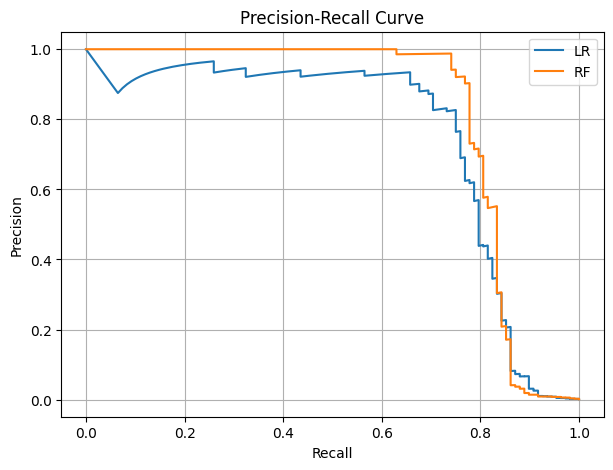

In [84]:
#8️⃣ PRECISION-RECALL CURVE
# ================================
p_lr, r_lr, _ = precision_recall_curve(y_test, y_proba_lr)
p_rf, r_rf, _ = precision_recall_curve(y_test, y_proba_rf)

plt.figure(figsize=(7,5))
plt.plot(r_lr, p_lr, label="LR")
plt.plot(r_rf, p_rf, label="RF")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [85]:
# 9️⃣ FINAL CLASSIFICATION REPORTS
# ================================
thr = 0.5  # default threshold

print("\nLogistic Regression:")
print(classification_report(y_test, (y_proba_lr >= thr).astype(int)))

print("\nRandom Forest:")
print(classification_report(y_test, (y_proba_rf >= thr).astype(int)))

print("\nConfusion Matrix (RF):")
print(confusion_matrix(y_test, (y_proba_rf >= thr).astype(int)))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85335
           1       0.03      0.91      0.05       108

    accuracy                           0.96     85443
   macro avg       0.51      0.93      0.52     85443
weighted avg       1.00      0.96      0.98     85443


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.94      0.74      0.83       108

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix (RF):
[[85330     5]
 [   28    80]]


In [89]:
# train.py  (Random Forest, clean & production-safe)
import joblib
import json
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

DATA_PATH = r"C:\Users\lenovo\Desktop\notes\ML_project\creditcard.csv"


# -----------------------------------------------------------
# Load Data (NO engineered features — raw inputs only)
# -----------------------------------------------------------
def load_data(path):
    df = pd.read_csv(path)
    df = df.fillna(0)
    return df


# -----------------------------------------------------------
# Train Model (RandomForest)
# -----------------------------------------------------------
def main():
    df = load_data(DATA_PATH)

    # Base raw features for prediction
    feature_cols = ["Time", "Amount"] + [f"V{i}" for i in range(1, 29)]

    X = df[feature_cols]
    y = df["Class"]

    # Keep class ratio same using stratify
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    # Preprocessing: impute + scaling
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]), feature_cols)
        ],
        remainder="drop"
    )

    # RandomForest (fast + reliable)
    model = RandomForestClassifier(
        n_estimators=150,
        max_depth=12,
        min_samples_split=4,
        class_weight="balanced",
        random_state=42,
        n_jobs=1   # ← Windows-safe (avoid joblib error)
    )

    pipeline = Pipeline([
        ("preproc", preprocessor),
        ("clf", model)
    ])

    print("Training Random Forest...")
    pipeline.fit(X_train, y_train)

    # Evaluate
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    metrics = {
        "roc_auc": roc_auc_score(y_test, y_proba),
        "pr_auc": average_precision_score(y_test, y_proba)
    }

    # Save model
    joblib.dump(pipeline, "model_pipeline.pkl")

    # Save metrics
    with open("metrics.json", "w") as f:
        json.dump(metrics, f, indent=2)

    print("✔ Model Saved!")
    print(metrics)


if __name__ == "__main__":
    main()


Training Random Forest...
✔ Model Saved!
{'roc_auc': np.float64(0.9621573695742756), 'pr_auc': np.float64(0.7953597836771297)}
